In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (12,4)

In [464]:
r0 = .05
a = 10
b = .05
sigma = .1
T = 1.
theta = .75

In [115]:
def interest_rate_simulation(h, N=100, r0=r0, sigma= sigma, a=a, b=b):
    r = [r0]

    var = sigma**2 * (1-np.exp(-2*a*h))/2*a

    for _ in range(1,N+1):
        mean = b + np.exp(-a*h)*(r[-1]-b)
        r.append(np.random.normal(mean,np.sqrt(var)))

    time = np.arange(N+1)
    
    return time, r 

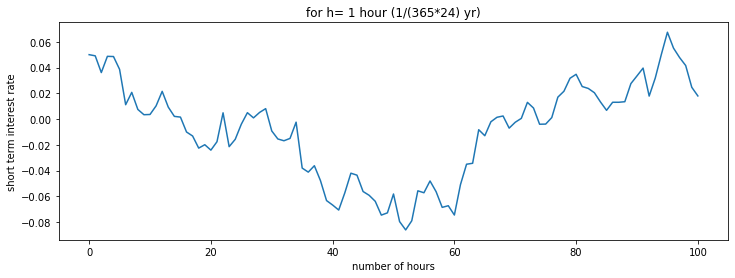

In [119]:
h = 1/(365*24) # 1 hour
time, r = interest_rate_simulation(h)
plt.plot(time, r)
plt.title("for h= 1 hour (1/(365*24) yr)")
plt.xlabel("number of hours")
plt.ylabel("short term interest rate")
plt.show()

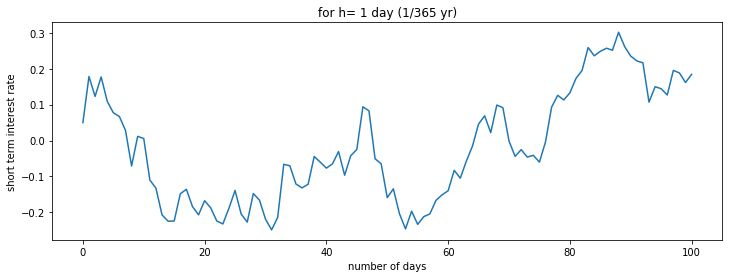

In [134]:
h = 1/365    # 1 day
time, r = interest_rate_simulation(h)
plt.plot(time, r)
plt.title("for h= 1 day (1/365 yr)")
plt.xlabel("number of days")
plt.ylabel("short term interest rate")
plt.show()

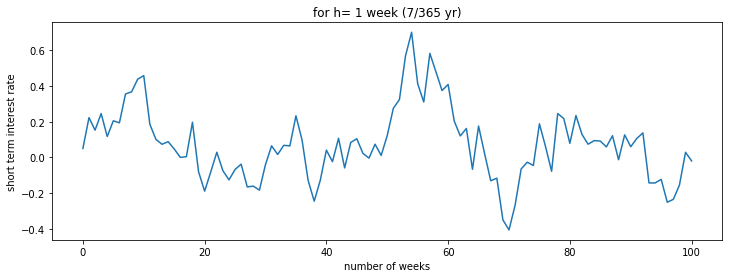

In [144]:
h = 7/365    # 1 week
time, r = interest_rate_simulation(h)
plt.plot(time, r)
plt.title("for h= 1 week (7/365 yr)")
plt.xlabel("number of weeks")
plt.ylabel("short term interest rate")
plt.show()

C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\akrou\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

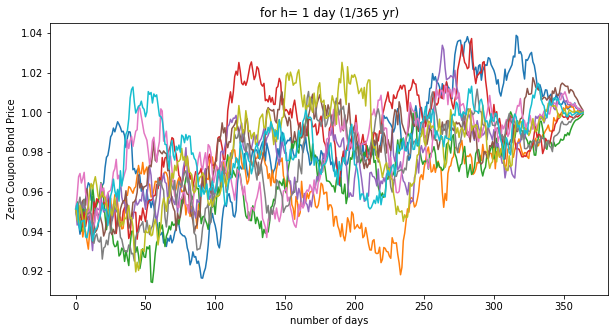

In [462]:
h = 1/365 # 1 day
N = 365

R_inf = b-sigma**2/(2*a**2)
def R(theta, r):
    return R_inf - ((R_inf-r)*(1-np.exp(-a*theta))-sigma**2/(4*a**2)*(1-np.exp(-a*theta))**2)/(a*theta)

for _ in range (10):
        P0 = lambda T: np.exp(-T*R(T,r0))

        r = [r0]
        P = [P0(T)]

        var = sigma**2 * (1-np.exp(-2*a*h))/2*a

        for k in range(1,N+1):
            mean = b + np.exp(-a*h)*(r[-1]-b)
            r.append(np.random.normal(mean,np.sqrt(var)))
            P.append(np.exp(-(T-k*h)*R(T-k*h,r[-1])))

        time = np.arange(N+1)

        plt.plot(time,P)
        
plt.title("for h= 1 day (1/365 yr)")
plt.xlabel("number of days")
plt.ylabel("Zero Coupon Bond Price")
plt.show()

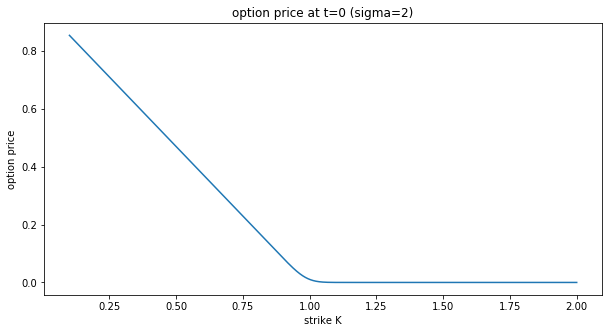

In [418]:
plt.rcParams["figure.figsize"] = (10,5)
T=1.
theta = .75

def Sigma2(t, T, theta):
    return sigma**2/(2*a**3) * (np.exp(-a*T)-np.exp(-a*theta))**2 * (np.exp(2*a*theta)-np.exp(2*a*t))

d1 = lambda t,x,K: (np.log(x/K) + Sigma2(t, T, theta)/2) / np.sqrt(Sigma2(t, T, theta))

d2 = lambda t,x,K: d1(t,x,K) - np.sqrt(Sigma2(t, T, theta))

N_cdf = lambda d: (1. + erf(d/np.sqrt(2.))) /2.

B = lambda t,x,K: x*N_cdf(d1(t,x,K)) - K*N_cdf(d2(t,x,K))

C0 = lambda K: P0(theta)*B(0,P0(T)/P0(theta),K)

C = lambda t, P_T, P_theta: P_theta*B(t,P_T/P_theta,K)

K = np.linspace(.1,2,10000)
c = C0(K)
plt.plot(K,c)
plt.title(f"option price at t=0 (sigma={sigma})")
plt.xlabel("strike K")
plt.ylabel("option price")
plt.show()


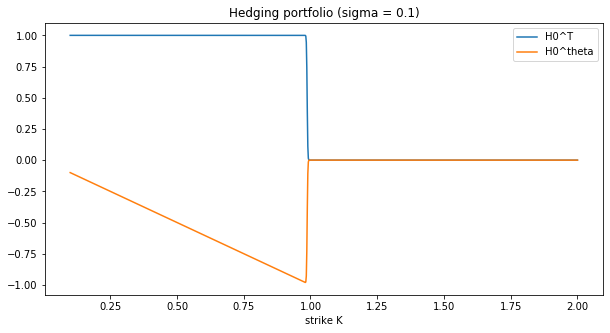

In [420]:
# plot H_0^T and H_0^theta
def H0_T(K):
    return N_cdf(d1(0, P0(T)/P0(theta),K))

def H0_theta(K):
    return -K*N_cdf(d2(0,P0(T)/P0(theta),K))

K = np.linspace(0.1,2,1000)
plt.plot(K, H0_T(K), label="H0^T")
plt.plot(K, H0_theta(K), label="H0^theta")
plt.title(f"Hedging portfolio (sigma = {sigma})")
plt.xlabel("strike K")
plt.legend()
plt.show()
    



In [453]:
T = 1.
theta = .75
K = .9

mean : -3.469446951953614e-18
std  : 4.4942396789402696e-17


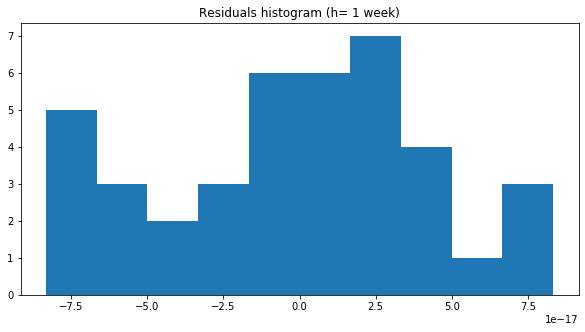

In [454]:
h = 7/365 
N = int(365/7*theta)

r = [r0]
P_T = [P0(T)]
P_theta = [P0(theta)]
H_T = [N_cdf(d1(0,P0(T)/P0(theta),K))]
H_theta = [-K*N_cdf(d2(0,P0(T)/P0(theta),K))]
C_t = [C0(K)]

var = sigma**2 * (1-np.exp(-2*a*h))/2*a

for k in range(1,N+1):
    mean = b + np.exp(-a*h)*(r[-1]-b)
    r.append(np.random.normal(mean,np.sqrt(var)))
    
    P_T.append(np.exp(-(T-k*h)*R(T-k*h,r[-1])))
    P_theta.append(np.exp(-(theta-k*h)*R(theta-k*h,r[-1])))
    
    H_T.append(N_cdf(d1(k*h, P_T[-1]/P_theta[-1], K)))
    H_theta.append(H_theta[-1] - P_T[-1]/P_theta[-1] * (H_T[-1] - H_T[-2]))
    
    C_t.append(C(k*h, P_T[-1], P_theta[-1]))

H_T = np.array(H_T)
H_theta = np.array(H_theta)
P_T = np.array(P_T)
P_theta = np.array(P_theta)

C_t = np.array(C_t)
#plt.plot(H_T, label="H_T")
#plt.plot(H_theta, label='H_theta')

#plt.plot(C_t)
#plt.plot(H_T*P_T + H_theta*P_theta)

Risque_residuel =  C_t - (H_T*P_T + H_theta*P_theta)
#plt.plot(Risque_residuel, )
plt.hist(Risque_residuel)
print(f"mean : {Risque_residuel.mean()}")
print(f"std  : {Risque_residuel.std()}")
plt.title("Residuals histogram (h= 1 week)")
plt.show()

mean : -4.811641758183845e-18
std  : 4.6408094725604795e-17


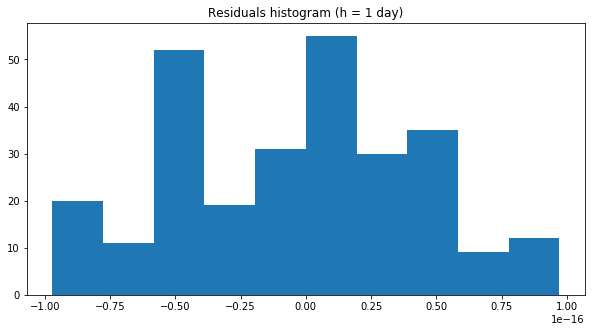

In [455]:
h = 1/365 
N = int(365*.75)

r = [r0]
P_T = [P0(T)]
P_theta = [P0(theta)]
H_T = [N_cdf(d1(0,P0(T)/P0(theta),K))]
H_theta = [-K*N_cdf(d2(0,P0(T)/P0(theta),K))]
C_t = [C0(K)]

var = sigma**2 * (1-np.exp(-2*a*h))/2*a

for k in range(1,N+1):
    mean = b + np.exp(-a*h)*(r[-1]-b)
    r.append(np.random.normal(mean,np.sqrt(var)))
    
    P_T.append(np.exp(-(T-k*h)*R(T-k*h,r[-1])))
    P_theta.append(np.exp(-(theta-k*h)*R(theta-k*h,r[-1])))
    
    H_T.append(N_cdf(d1(k*h, P_T[-1]/P_theta[-1], K)))
    H_theta.append(H_theta[-1] - P_T[-1]/P_theta[-1] * (H_T[-1] - H_T[-2]))
    
    C_t.append(C(k*h, P_T[-1], P_theta[-1]))

H_T = np.array(H_T)
H_theta = np.array(H_theta)
P_T = np.array(P_T)
P_theta = np.array(P_theta)

C_t = np.array(C_t)
#plt.plot(H_T, label="H_T")
#plt.plot(H_theta, label='H_theta')

#plt.plot(C_t)
#plt.plot(H_T*P_T + H_theta*P_theta)

Risque_residuel =  C_t - (H_T*P_T + H_theta*P_theta)
#plt.plot(Risque_residuel, )
plt.hist(Risque_residuel)
print(f"mean : {Risque_residuel.mean()}")
print(f"std  : {Risque_residuel.std()}")
plt.title("Residuals histogram (h = 1 day)")
plt.show()

mean : -7.709882115452476e-18
std  : 4.631066338338284e-17


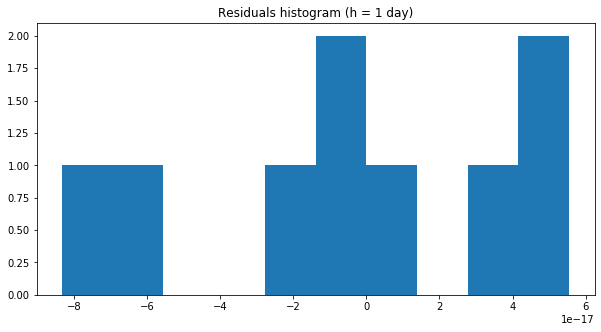

In [459]:
h = 30/365
N = int((365/30)*.75)-1

r = [r0]
P_T = [P0(T)]
P_theta = [P0(theta)]
H_T = [N_cdf(d1(0,P0(T)/P0(theta),K))]
H_theta = [-K*N_cdf(d2(0,P0(T)/P0(theta),K))]
C_t = [C0(K)]

var = sigma**2 * (1-np.exp(-2*a*h))/2*a

for k in range(1,N+1):
    mean = b + np.exp(-a*h)*(r[-1]-b)
    r.append(np.random.normal(mean,np.sqrt(var)))
    
    P_T.append(np.exp(-(T-k*h)*R(T-k*h,r[-1])))
    P_theta.append(np.exp(-(theta-k*h)*R(theta-k*h,r[-1])))
    
    H_T.append(N_cdf(d1(k*h, P_T[-1]/P_theta[-1], K)))
    H_theta.append(H_theta[-1] - P_T[-1]/P_theta[-1] * (H_T[-1] - H_T[-2]))
    
    C_t.append(C(k*h, P_T[-1], P_theta[-1]))

H_T = np.array(H_T)
H_theta = np.array(H_theta)
P_T = np.array(P_T)
P_theta = np.array(P_theta)

C_t = np.array(C_t)
#plt.plot(H_T, label="H_T")
#plt.plot(H_theta, label='H_theta')

#plt.plot(C_t)
#plt.plot(H_T*P_T + H_theta*P_theta)

Risque_residuel =  C_t - (H_T*P_T + H_theta*P_theta)
#plt.plot(Risque_residuel, )
plt.hist(Risque_residuel)
print(f"mean : {Risque_residuel.mean()}")
print(f"std  : {Risque_residuel.std()}")
plt.title("Residuals histogram (h = 1 day)")
plt.show()